In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [2]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/fullYear_S_Eta_EKE_Depth_hor_vel_SIarea_Temp.nc')
dfU = xr.open_dataset('C:/Users/eirik/Master/Data/U_interp.nc')
dfV = xr.open_dataset('C:/Users/eirik/Master/Data/V_interp.nc')

In [3]:
S = df['S'].sel(Y=72.6,method='nearest')
S_3Month = S.resample(time='3ME').mean(dim='time')
S_Mean = S.mean(dim='time')
display(S.Y)

<xarray.DataArray 'Y' ()>
array(72.58998644)
Coordinates:
    Y        float64 72.59
Attributes:
    long_name:  latitude of cell center
    units:      degrees_north

In [34]:
display(S_Month.time.values)

array(['2017-09-30T00:00:00.000000000', '2017-10-31T00:00:00.000000000',
       '2017-11-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-01-31T00:00:00.000000000', '2018-02-28T00:00:00.000000000',
       '2018-03-31T00:00:00.000000000', '2018-04-30T00:00:00.000000000',
       '2018-05-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-07-31T00:00:00.000000000', '2018-08-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

Text(0.5, 0.98, 'Salinity')

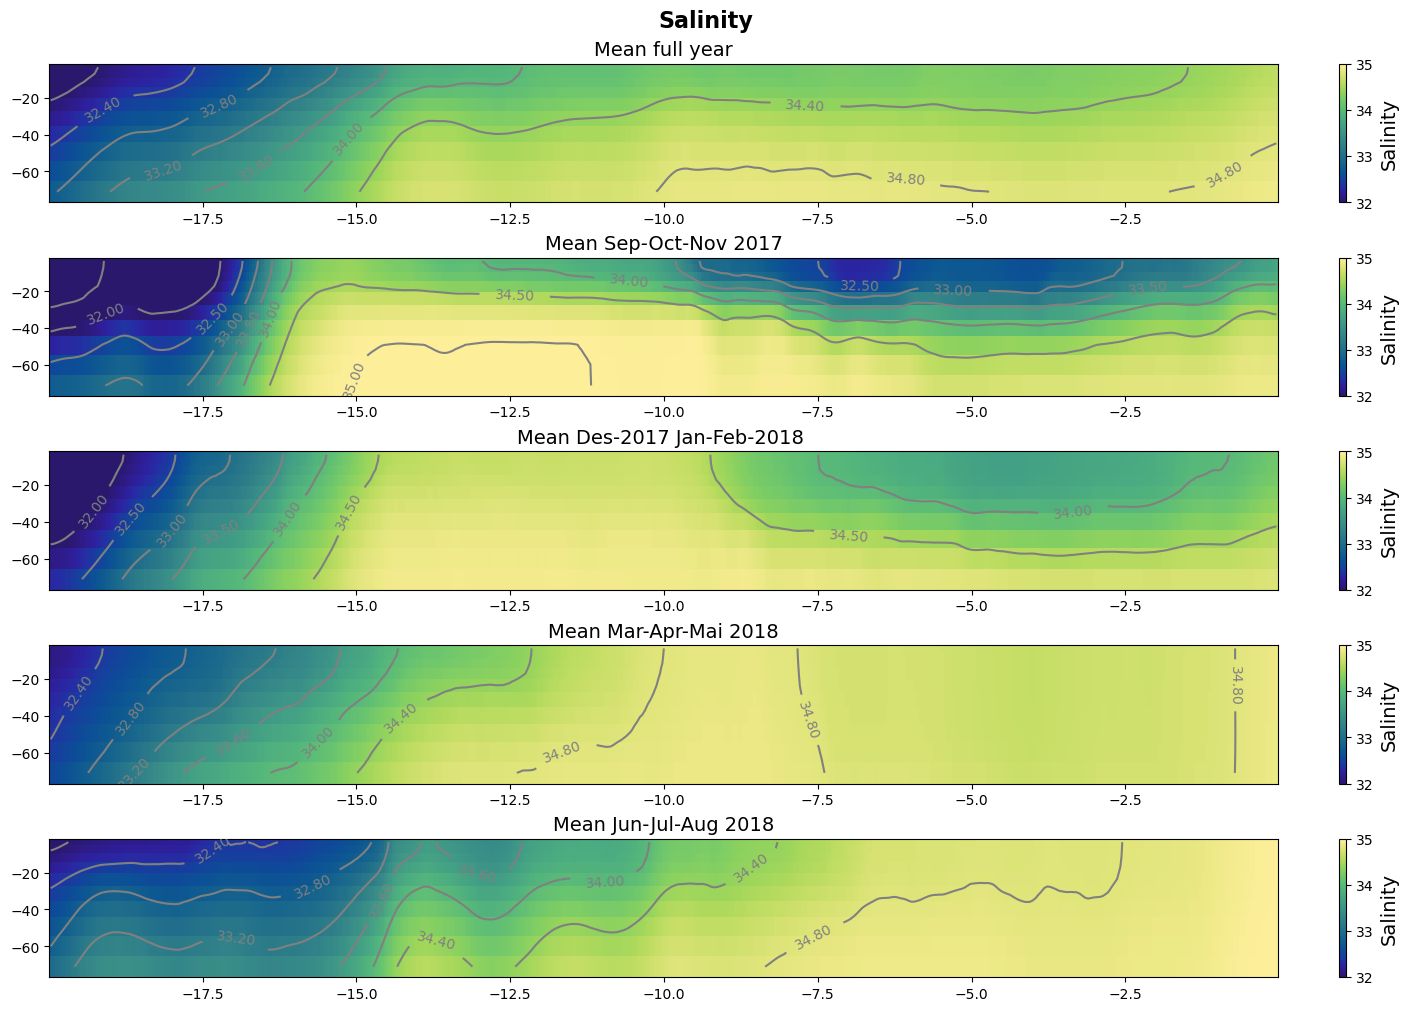

In [39]:
data3M = S_3Month
dataM = S_Mean
cmap = cmo.haline
Name = 'Salinity'
vmin = 32
vmax = 35

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,10),layout='constrained')

# Mean full year
mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
cbar1 = fig.colorbar(mesh1)
cbar1.set_label('Salinity',fontsize=14)
cntr = ax1.contour(dataM.X,dataM.Z,dataM,colors='grey')
ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax1.set_title('Mean full year',fontsize=14)

# Sep-Oct-Nov
mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
cbar2 = fig.colorbar(mesh2)
cbar2.set_label('Salinity',fontsize=14)
cntr = ax2.contour(data3M.X,data3M.Z,data3M[0],colors='grey')
ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)

# Des-Jan-Feb
mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
cbar3 = fig.colorbar(mesh3)
cbar3.set_label('Salinity',fontsize=14)
cntr = ax3.contour(data3M.X,data3M.Z,data3M[1],colors='grey')
ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)

# Mar-Apr-Mai
mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
cbar4 = fig.colorbar(mesh4)
cbar4.set_label('Salinity',fontsize=14)
cntr = ax4.contour(data3M.X,data3M.Z,data3M[2],colors='grey')
ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)

# Jun-Jul-Aug
mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
cbar5 = fig.colorbar(mesh5)
cbar5.set_label('Salinity',fontsize=14)
cntr = ax5.contour(data3M.X,data3M.Z,data3M[3],colors='grey')
ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)

fig.suptitle(Name,fontweight='bold',fontsize=16)

In [67]:
def vertical_plot_3M_M(data3M,dataM,cmap,plotName,fileName=str(),vmin=None,vmax=None,cbarName=str(),interpCoords=False):
    """
    Plotting the choosen values for each 3M period with first plot displaying the mean.\n
    The layout is specificly created for the full year run of the IGP dataset.\n
    \n
    data3M: Resampled data with three month mean\n
    dataM: Mean of dataset with dim='time'
    """

    if interpCoords:
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,10),layout='constrained')

        # Mean full year
        mesh1 = ax1.pcolormesh(dataM.Xp1,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
        cbar1 = fig.colorbar(mesh1)
        cbar1.set_label(cbarName,fontsize=12)
        cntr = ax1.contour(dataM.Xp1,dataM.Z,dataM,colors='grey')
        ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax1.set_title('Mean full year',fontsize=14)

        # Sep-Oct-Nov
        mesh2 = ax2.pcolormesh(data3M.Xp1,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar2 = fig.colorbar(mesh2)
        cbar2.set_label(cbarName,fontsize=12)
        cntr = ax2.contour(data3M.Xp1,data3M.Z,data3M[0],colors='grey')
        ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)

        # Des-Jan-Feb
        mesh3 = ax3.pcolormesh(data3M.Xp1,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar3 = fig.colorbar(mesh3)
        cbar3.set_label(cbarName,fontsize=12)
        cntr = ax3.contour(data3M.Xp1,data3M.Z,data3M[1],colors='grey')
        ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)

        # Mar-Apr-Mai
        mesh4 = ax4.pcolormesh(data3M.Xp1,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar4 = fig.colorbar(mesh4)
        cbar4.set_label(cbarName,fontsize=12)
        cntr = ax4.contour(data3M.Xp1,data3M.Z,data3M[2],colors='grey')
        ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)

        # Jun-Jul-Aug
        mesh5 = ax5.pcolormesh(data3M.Xp1,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar5 = fig.colorbar(mesh5)
        cbar5.set_label(cbarName,fontsize=12)
        cntr = ax5.contour(data3M.Xp1,data3M.Z,data3M[3],colors='grey')
        ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)

        fig.suptitle(plotName,fontweight='bold',fontsize=16)
        plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

    else:
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,10),layout='constrained')

        # Mean full year
        mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
        cbar1 = fig.colorbar(mesh1)
        cbar1.set_label(cbarName,fontsize=12)
        cntr = ax1.contour(dataM.X,dataM.Z,dataM,colors='grey')
        ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax1.set_title('Mean full year',fontsize=14)

        # Sep-Oct-Nov
        mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar2 = fig.colorbar(mesh2)
        cbar2.set_label(cbarName,fontsize=12)
        cntr = ax2.contour(data3M.X,data3M.Z,data3M[0],colors='grey')
        ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)

        # Des-Jan-Feb
        mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar3 = fig.colorbar(mesh3)
        cbar3.set_label(cbarName,fontsize=12)
        cntr = ax3.contour(data3M.X,data3M.Z,data3M[1],colors='grey')
        ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)

        # Mar-Apr-Mai
        mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar4 = fig.colorbar(mesh4)
        cbar4.set_label(cbarName,fontsize=12)
        cntr = ax4.contour(data3M.X,data3M.Z,data3M[2],colors='grey')
        ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)

        # Jun-Jul-Aug
        mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar5 = fig.colorbar(mesh5)
        cbar5.set_label(cbarName,fontsize=12)
        cntr = ax5.contour(data3M.X,data3M.Z,data3M[3],colors='grey')
        ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)

        fig.suptitle(plotName,fontweight='bold',fontsize=16)
        plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

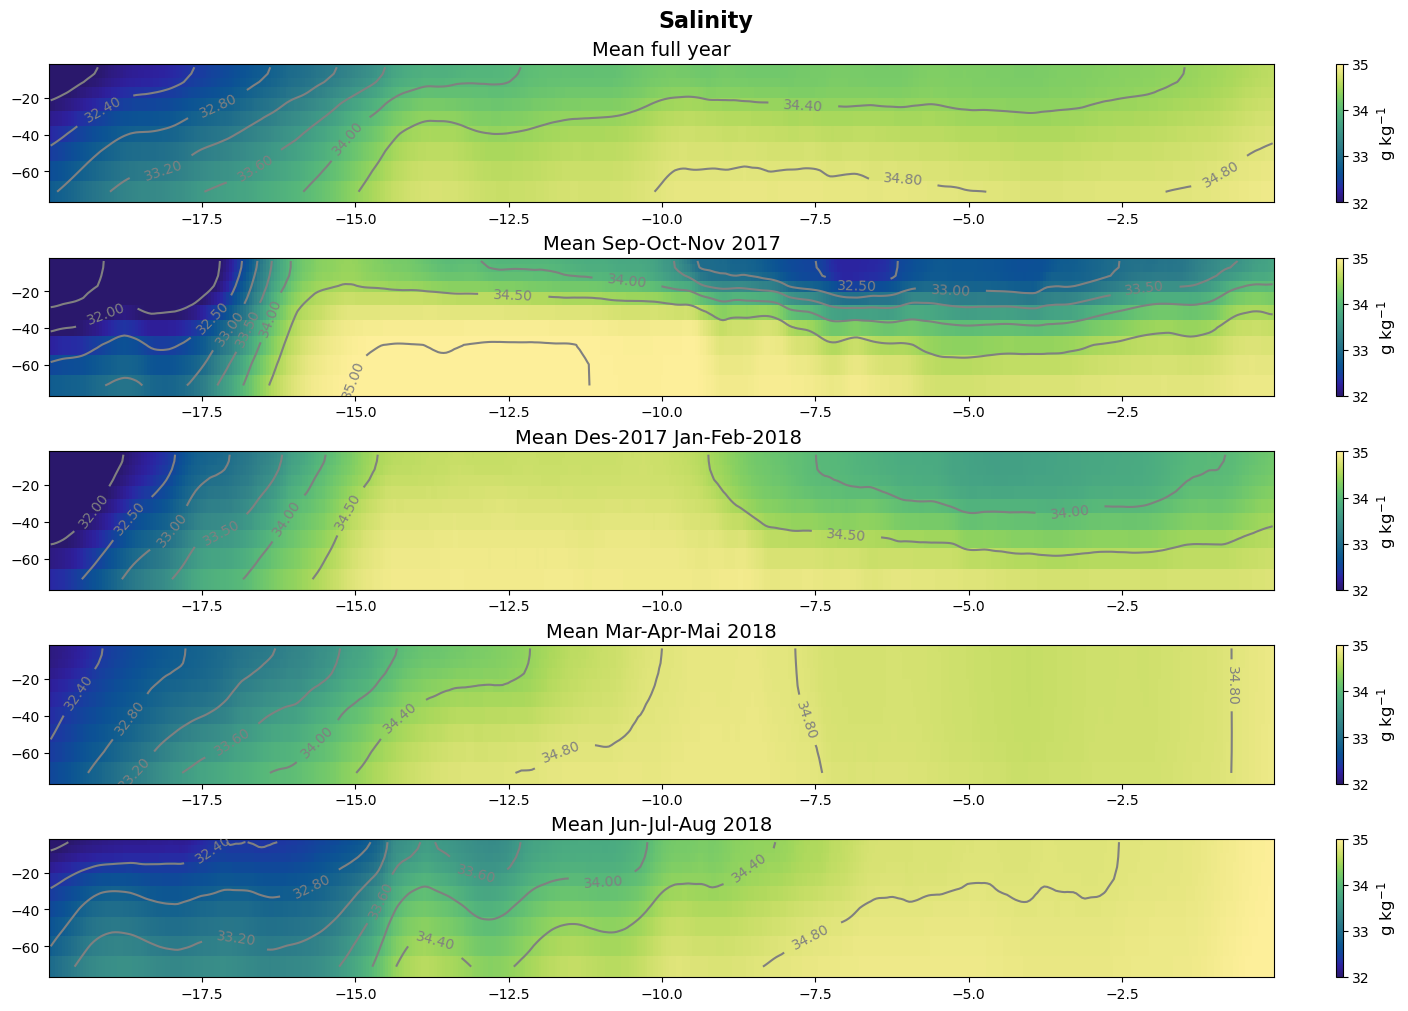

In [68]:
vertical_plot_3M_M(S_3Month,S_Mean,cmo.haline,'Salinity','Salinity3MYear',vmin=32,vmax=35,cbarName='g kg$^{-1}$')

In [48]:
T = df['Temp'].sel(Y=72.6,method='nearest')
T_3Month = T.resample(time='3ME').mean(dim='time')
T_Mean = T.mean(dim='time')

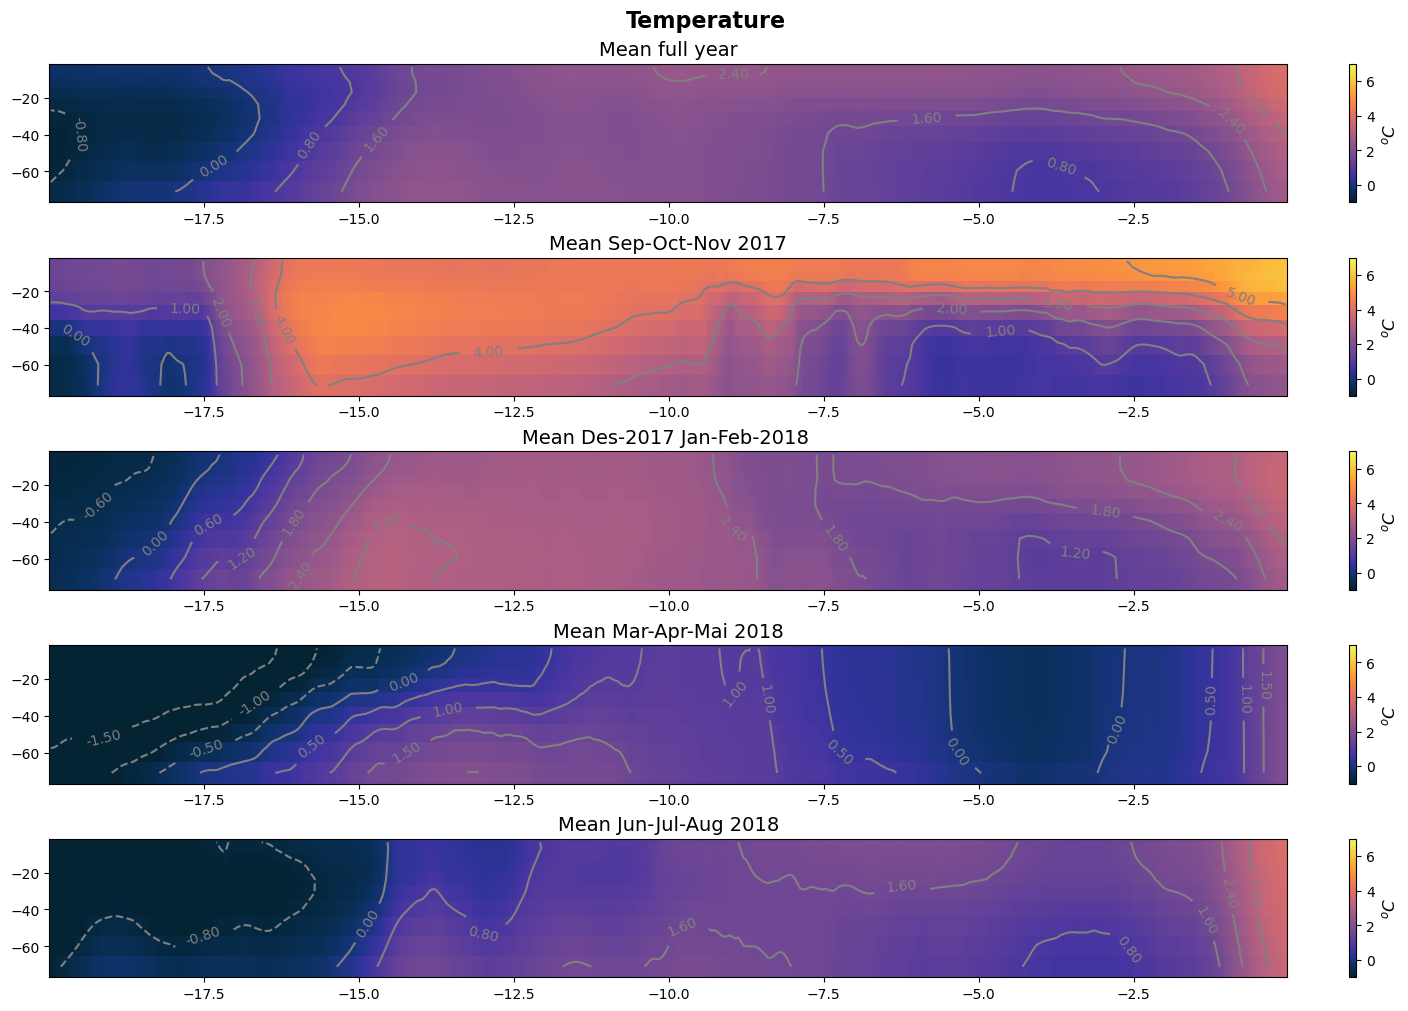

In [61]:
vertical_plot_3M_M(T_3Month,T_Mean,cmo.thermal,'Temperature','Temperature3MYear',vmin=-1,vmax=7,cbarName='$^oC$')

In [56]:
V = dfV['V_interp'].sel(Yp1=72.6,method='nearest')
V_3Month = V.resample(time='3ME').mean(dim='time')
V_Mean = V.mean(dim='time')

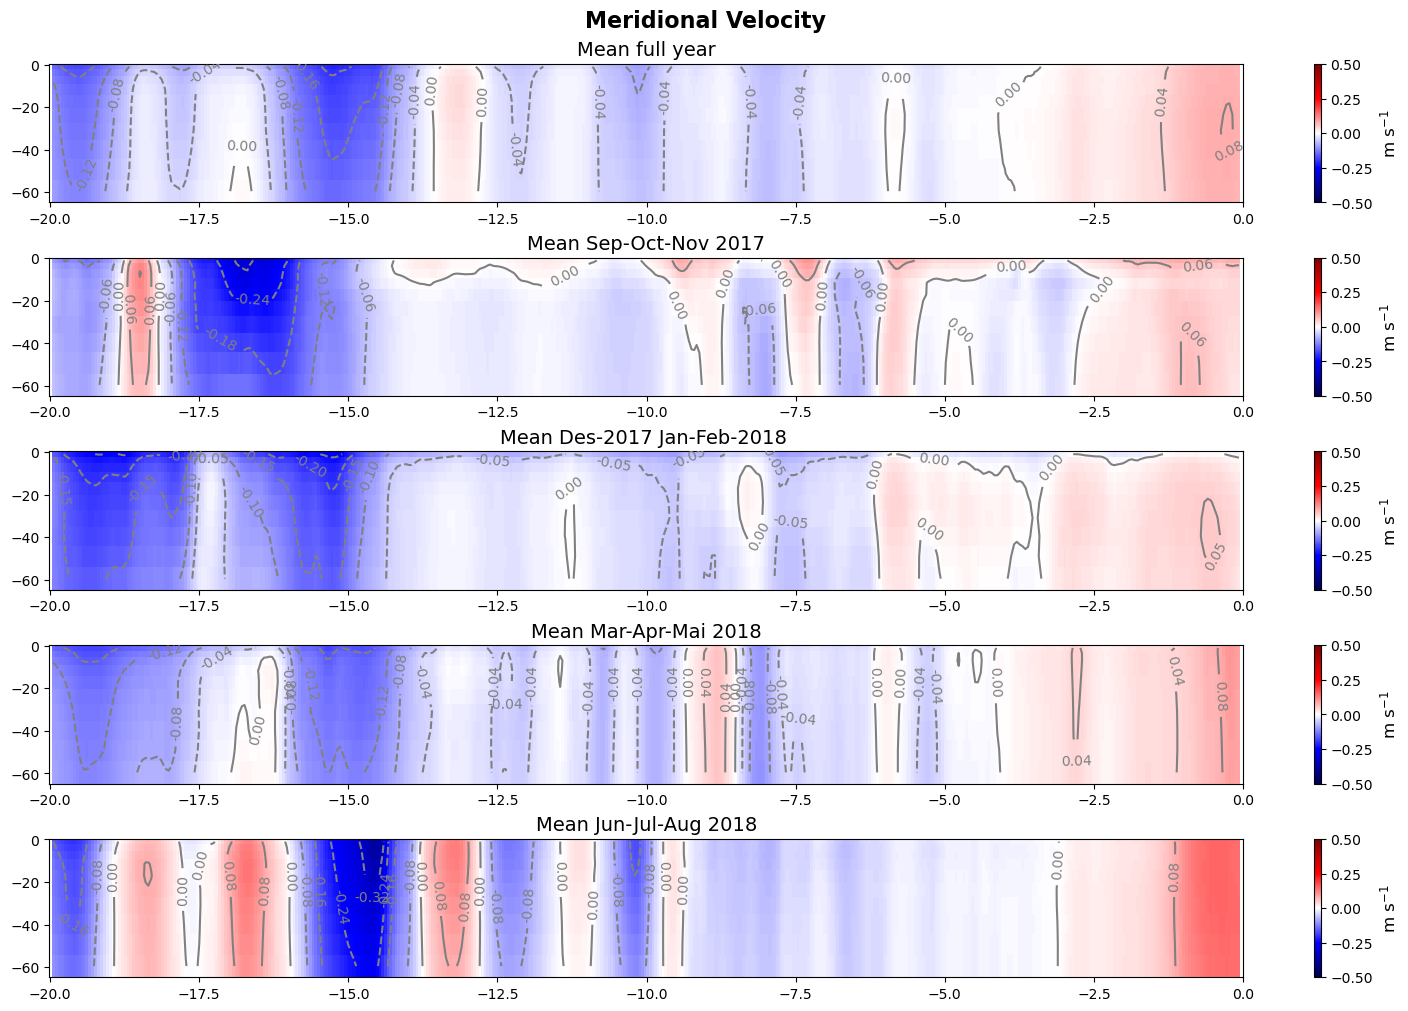

In [63]:
vertical_plot_3M_M(V_3Month,V_Mean,'seismic','Meridional Velocity','MeridionalVelocity3MYear',vmin=-0.5,vmax=0.5,cbarName='m s$^{-1}$',interpCoords=True)